## Week02 homework - Perceptron from scratch

This exercise is intended to allow you for designing a Perceptron algorithm for a binary classification problem (as discussed in the lecture).

You can use any reference material (lecture slides, seminar code, books etc) to implement your Perceptron.

We gave you some code and a problem definition.



In [ ]:
# Import libraries
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# Random seed generator
np.random.seed(1)

# Plotting functions

In [ ]:
# Helper functions for plotting the data and the decision boundary
def show_data(c1, c2, gamma):
    plt.scatter(c1[:, 0], c1[:, 1])
    plt.scatter(c2[:, 0], c2[:, 1])
    plt.axvline(x=gamma / 2.0, color='k', linestyle='--')
    plt.axvline(x=-gamma / 2.0, color='k', linestyle='--')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()


def plot_decision_boundary(data, labels, weights):
    xx, yy = np.mgrid[-1.1:1.1:0.1, -0.7:0.7:0.1]
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = predict(grid, weights)
    zz = np.array(preds).reshape(xx.shape)
    plt.contour(xx, yy, zz, levels=[0.01], cmap='winter')
    plt.scatter(data[:, 0], data[:, 1], s=20, cmap='cool', c=labels, vmin=0, vmax=1)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

# Generate and plot data

In [ ]:
# n - number of data points to be generated
def generateData(n):
 """ 
  generates a 2D linearly separable dataset with n samples. 
  The third element of the sample is the label
 """

 gamma = 0.05

 # left size - before gamma
 xb = np.random.uniform(-1.0, -gamma/2.0, size=n).astype("float32")
 yb = np.random.uniform(-0.5, 0.5, size=n).astype("float32")
 # right size - after gamma
 xr = np.random.uniform(gamma/2.0, 1.0, size=n).astype("float32")
 yr = np.random.uniform(-0.5, 0.5, size=n).astype("float32")

 # classes 
 c1 = np.squeeze(np.dstack((xb, yb)))
 c2 = np.squeeze(np.dstack((xr, yr)))

 # plot the data
 show_data(c1, c2, gamma)

 inputs = []
 # third element is the class: -1, 1
 for i in range(len(xb)):
   inputs.append([xb[i],yb[i],-1])
   inputs.append([xr[i],yr[i],1])
 return inputs

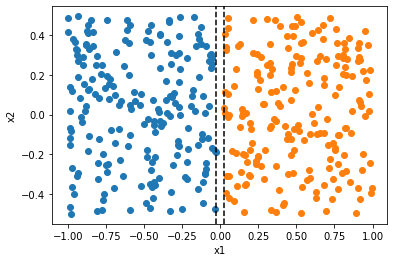

In [ ]:
# generating 200 samples as training data
trainset = generateData(200) 

In [ ]:
# quick view of a data sample - (x,y) coordinates + class label
trainset[0]

[-0.5934035, 0.45017612, -1]

# Perceptron algorithm 
* Class label $y_i \in \{-1, 1\}$ 
* Threshold function $h(x)=-1$ if $x < 0$; $h(x)=1$ if $x \geq 0 $
* The prediction: $\hat{y_i} = h(\phi (x_i)^\top w)$
* Correct classification: $y_i \phi (x_i)^\top w > 0$
* False classification: $y_i \phi (x_i)^\top w < 0$
* Goal: find parameters $w \in \mathbb{R}^n$ such that all inputs $y_i \phi (x_i)^\top w > 0$
* Loss function is defined as $$\mathcal{L}(w)= \sum_{i=1}^m \max (-y_i \phi (x_i)^\top w, 0)$$

# Psuedo code

* Initialisation: iteration $t=0$, learning rate $\eta>0$, parameters $w^{(0)}$ arbitrarily 
* Repeat until $\forall (x_i, y_i): y_i \phi (x_i)^\top w > 0$ \\
$\qquad \quad \hat{y}_i^t = h(\phi (x_i^t)^\top w^{(t)})$ \\
$\qquad \quad \mathbf{if} \, \hat{y}_i^t \neq y_i^t \, \mathbf{then}$ \\
$\qquad \qquad \quad w^{(t+1)} = w^{(t)} + \eta y_i^t \phi (x_i^t)$ \\
$\qquad \quad \mathbf{else}$ \\
$\qquad \qquad \quad w^{(t+1)} = w^{(t)}$ \\
$\qquad \quad \mathbf{end} \, \mathbf{if}$ \\
$\qquad \quad t = t + 1$



In [ ]:
## YOUR SOLUTION HERE

## Please, provide proper functions for your Perceptron algorithm (following the specification and pseudocode above).
## You can plot some useful metrics, such as loss x number of epochs. There is also a helper function for plotting the decision boundary (final model).